# Sentiment Analysis 3
Doc2Vec

In [1]:
import gensim
from gensim.models import Doc2Vec
import nltk
import numpy as np
from random import shuffle
from sklearn.linear_model import LogisticRegression

C:\Users\SNB\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import multiprocessing
import os

In [3]:
import tqdm
import glob
import datetime
from sklearn.decomposition import PCA
import pickle
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
stop_words = set(stopwords.words('english'))
lemm = WordNetLemmatizer()

In [5]:
LabeledSentence = gensim.models.doc2vec.LabeledSentence

In [6]:
# load train reviews
train_reviews = []
for i in tqdm.tqdm(glob.glob("./data/aclImdb/train/pos/*.txt")):
    with open(i, "r", encoding="utf-8") as f:
        train_reviews.append(f.read())
for j in tqdm.tqdm(glob.glob("./data/aclImdb/train/neg/*.txt")):
    with open(j, "r", encoding="utf-8") as f:
        train_reviews.append(f.read())

print("done,", datetime.datetime.today())

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:49<00:00, 252.66it/s]


done, 2018-01-05 14:35:20.275448


In [7]:
temp_1 = []
labeledlist = []
for i, review in enumerate(tqdm.tqdm(train_reviews)):
    temp_1 = nltk.tokenize.word_tokenize(review.lower(), language="english")
    temp_2 = []
    for j in temp_1:
        if j.isalpha():
            temp_2.append(lemm.lemmatize(j))
    if i < 12500:
        labeledlist.append(LabeledSentence(words=temp_2, tags=["pos_"+str(i)]))
    else:
        labeledlist.append(LabeledSentence(words=temp_2, tags=["neg_"+str(i-12500)]))

print("done,", datetime.datetime.today())

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:57<00:00, 431.37it/s]


done, 2018-01-05 14:36:21.054849


In [8]:
model = Doc2Vec(alpha=0.025, min_alpha=0.025)  # use fixed learning rate
model.build_vocab(labeledlist)

In [9]:
model.train(labeledlist, total_examples=25000, epochs=20)
print("done,", datetime.datetime.today())

done, 2018-01-05 14:37:58.952868


In [24]:
model.most_similar("good")

[('decent', 0.7099470496177673),
 ('fine', 0.6225178241729736),
 ('great', 0.5937667489051819),
 ('strong', 0.5772299766540527),
 ('bad', 0.5728908181190491),
 ('solid', 0.5685356855392456),
 ('nice', 0.554256796836853),
 ('convincing', 0.5370105504989624),
 ('lousy', 0.535428524017334),
 ('terrible', 0.5344275832176208)]

In [11]:
x_train = []
y_train = []

In [12]:
for i in range(25000):
    if i < 12500:
        x_train.append(model.docvecs[i])
        y_train.append(1)
    else:
        x_train.append(model.docvecs[i])
        y_train.append(0)

In [14]:
len(x_train), len(y_train)

(25000, 25000)

In [13]:
# load base word set
f = open("./data/base_word", "rb")
base_word = pickle.load(f)
f.close()

In [14]:
data = sorted(base_word.items(), key=lambda t : t[1], reverse=True)

In [15]:
sort_word = []
for i in range(len(data)):
    if data[i][0].isalpha():
        sort_word.append(data[i])

In [65]:
words = []
for i in sort_word[1:101]:
    words.append(i[0])

In [66]:
words_vector = []
for i in words:
    words_vector.append(model.infer_vector(i))

In [67]:
pca = PCA(n_components=2)

In [68]:
pca_data = pca.fit_transform(words_vector)

In [69]:
data_word = pd.DataFrame(pca_data, words)

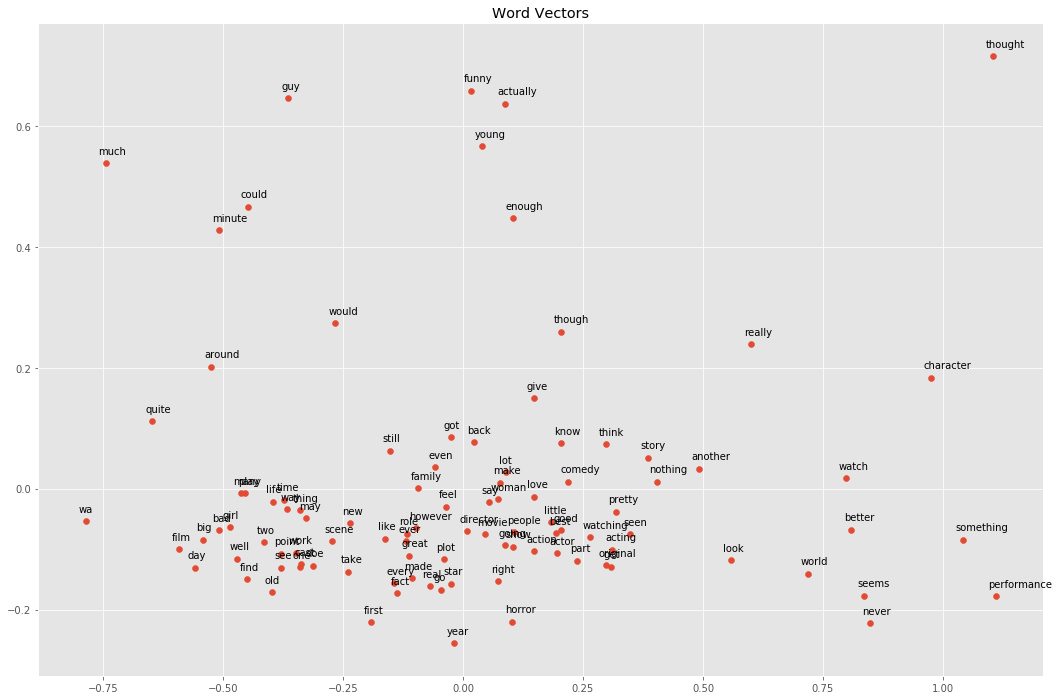

In [72]:
plt.style.use("ggplot")
plt.figure(figsize=(18, 12))
plt.scatter(data_word[0], data_word[1])
plt.title("Word Vectors")
for i, label in enumerate(data_word.index.values):
    plt.annotate(label, (data_word.values[i, 0] - 0.015, 
                         data_word.values[i, 1] + 0.015))
plt.show()

In [29]:
# load test reviews
test_reviews = []
for i in tqdm.tqdm(glob.glob("./data/aclImdb/test/pos/*.txt")):
    with open(i, "r", encoding="utf-8") as f:
        test_reviews.append(f.read())
for j in tqdm.tqdm(glob.glob("./data/aclImdb/test/neg/*.txt")):
    with open(j, "r", encoding="utf-8") as f:
        test_reviews.append(f.read())

print("done,", datetime.date.today())

100%|███████████████████████████████████████████████████████████████████████████| 12500/12500 [00:54<00:00, 230.33it/s]


done, 2018-01-04


In [30]:
# tokenize test reviews
test_tokens_review = []
lemm = WordNetLemmatizer()
for review in tqdm.tqdm(test_reviews):
    temp_1 = nltk.tokenize.word_tokenize(review.lower(), language="english")
    temp_2 = []
    for j in temp_1:
        if j.isalpha():
            temp_2.append(lemm.lemmatize(j))
        
    test_tokens_review.append(temp_2)

print("done,", datetime.datetime.today())

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [01:00<00:00, 413.96it/s]


done, 2018-01-04 10:49:40.726373


In [88]:
# infer vector using test reviews
x_test = []
y_test = []
for i, review in enumerate(tqdm.tqdm(test_tokens_review)):
    if i < 12500:
        x_test.append(model.infer_vector(review))
        y_test.append(1)
    else:
        x_test.append(model.infer_vector(review))
        y_test.append(0)

print("done,", datetime.datetime.today())

100%|███████████████████████████████████████████████████████████████████████████| 25000/25000 [00:35<00:00, 706.42it/s]


done, 2018-01-04 16:11:10.048310


In [89]:
# train logisticregression
clf = LogisticRegression()
clf.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [90]:
clf.score(x_test, y_test)

0.56367999999999996

In [91]:
clf.score(x_train, y_train)

0.68623999999999996